## 타이타닉 전처리 ##

# 분석을 할때 어떤 식으로 진행 할지 ,, 

* pclass 승객 등급 
* sibsp 함께 탑승한 형제, 배우자의 수 
* parch 함께 탑승한 자녀, 부모의 수 
* ticket 티켓 아이디 
* cabin 객실 번호 
* embarked 승객이 탑승한 곳 


내 목표 ,, 타이타닉 데이터를 분석해보자! 누가 살아남았고 뭐 이런거?

In [2]:
# 패키지 

import pandas as pd
import matplotlib.pyplot as plt

`-` 데이터 불러오기 

In [27]:
df = pd.read_csv('data/titanic.csv')

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df.head()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

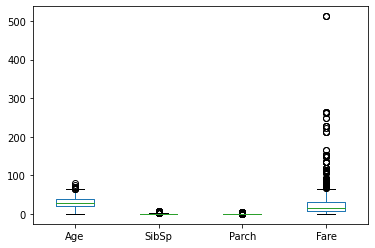

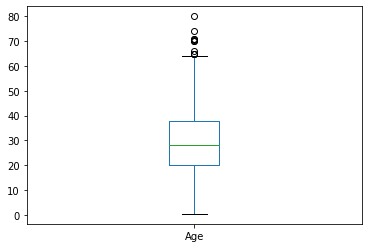

In [29]:
df.iloc[:,3:].plot(kind = 'box')
df[['Age']].plot(kind = 'box') # 박스 플롯 상 3분위수 이상이지만 유지하도록 함
# 또한 SibSp, Parch, Fare 또한 박스 플롯 상 이상치라 판단 되지만 상식상 가능한 수준임.

In [44]:
# 결측치 파악 및 대체 / 혹은 ,, 버리기 

df.isnull().sum() #Age, Cabin, Embarked 결측치가 있다. 

df = df.dropna(subset = ['Embarked']) # Embarked 결측치는 삭제 !

df = df.drop('Cabin', axis = 1)
# Age 결측치 방법 ,,, 평균값 대체 밖에 없을듯 ,,, 이걸 회귀분석하는건 좀 ,, 어려울것 같고 ,,, 
# Cabin는 아예 열 삭제! 지도 데이터가 있다면 ,, 모르지만 ,, 현재는 힘들듯 

KeyError: "['Cabin'] not found in axis"

In [46]:
df.corr() #우선 상관관계를 파악해보고 ,, Pclass/Fare  그나마 이거 두개가 좀 ,, 상관 관계가 있으니 ,, 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


In [49]:
df[['Pclass','Fare']]

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [63]:
#쉽게 생각하면 ,, Pclass 값들을 그룹지어 그룹별 ,, 나이를 넣기 

df.groupby(by =  ['Pclass']).mean().Age


# df.isnull().sum()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
# 하고 싶은거 ,, 'Fare'의 구간을 만들어서 거기서 'Pclass'를 그룹지어 거기 평균 넣기 